In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path='wine-clustering.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 13)

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

VISUALIZING

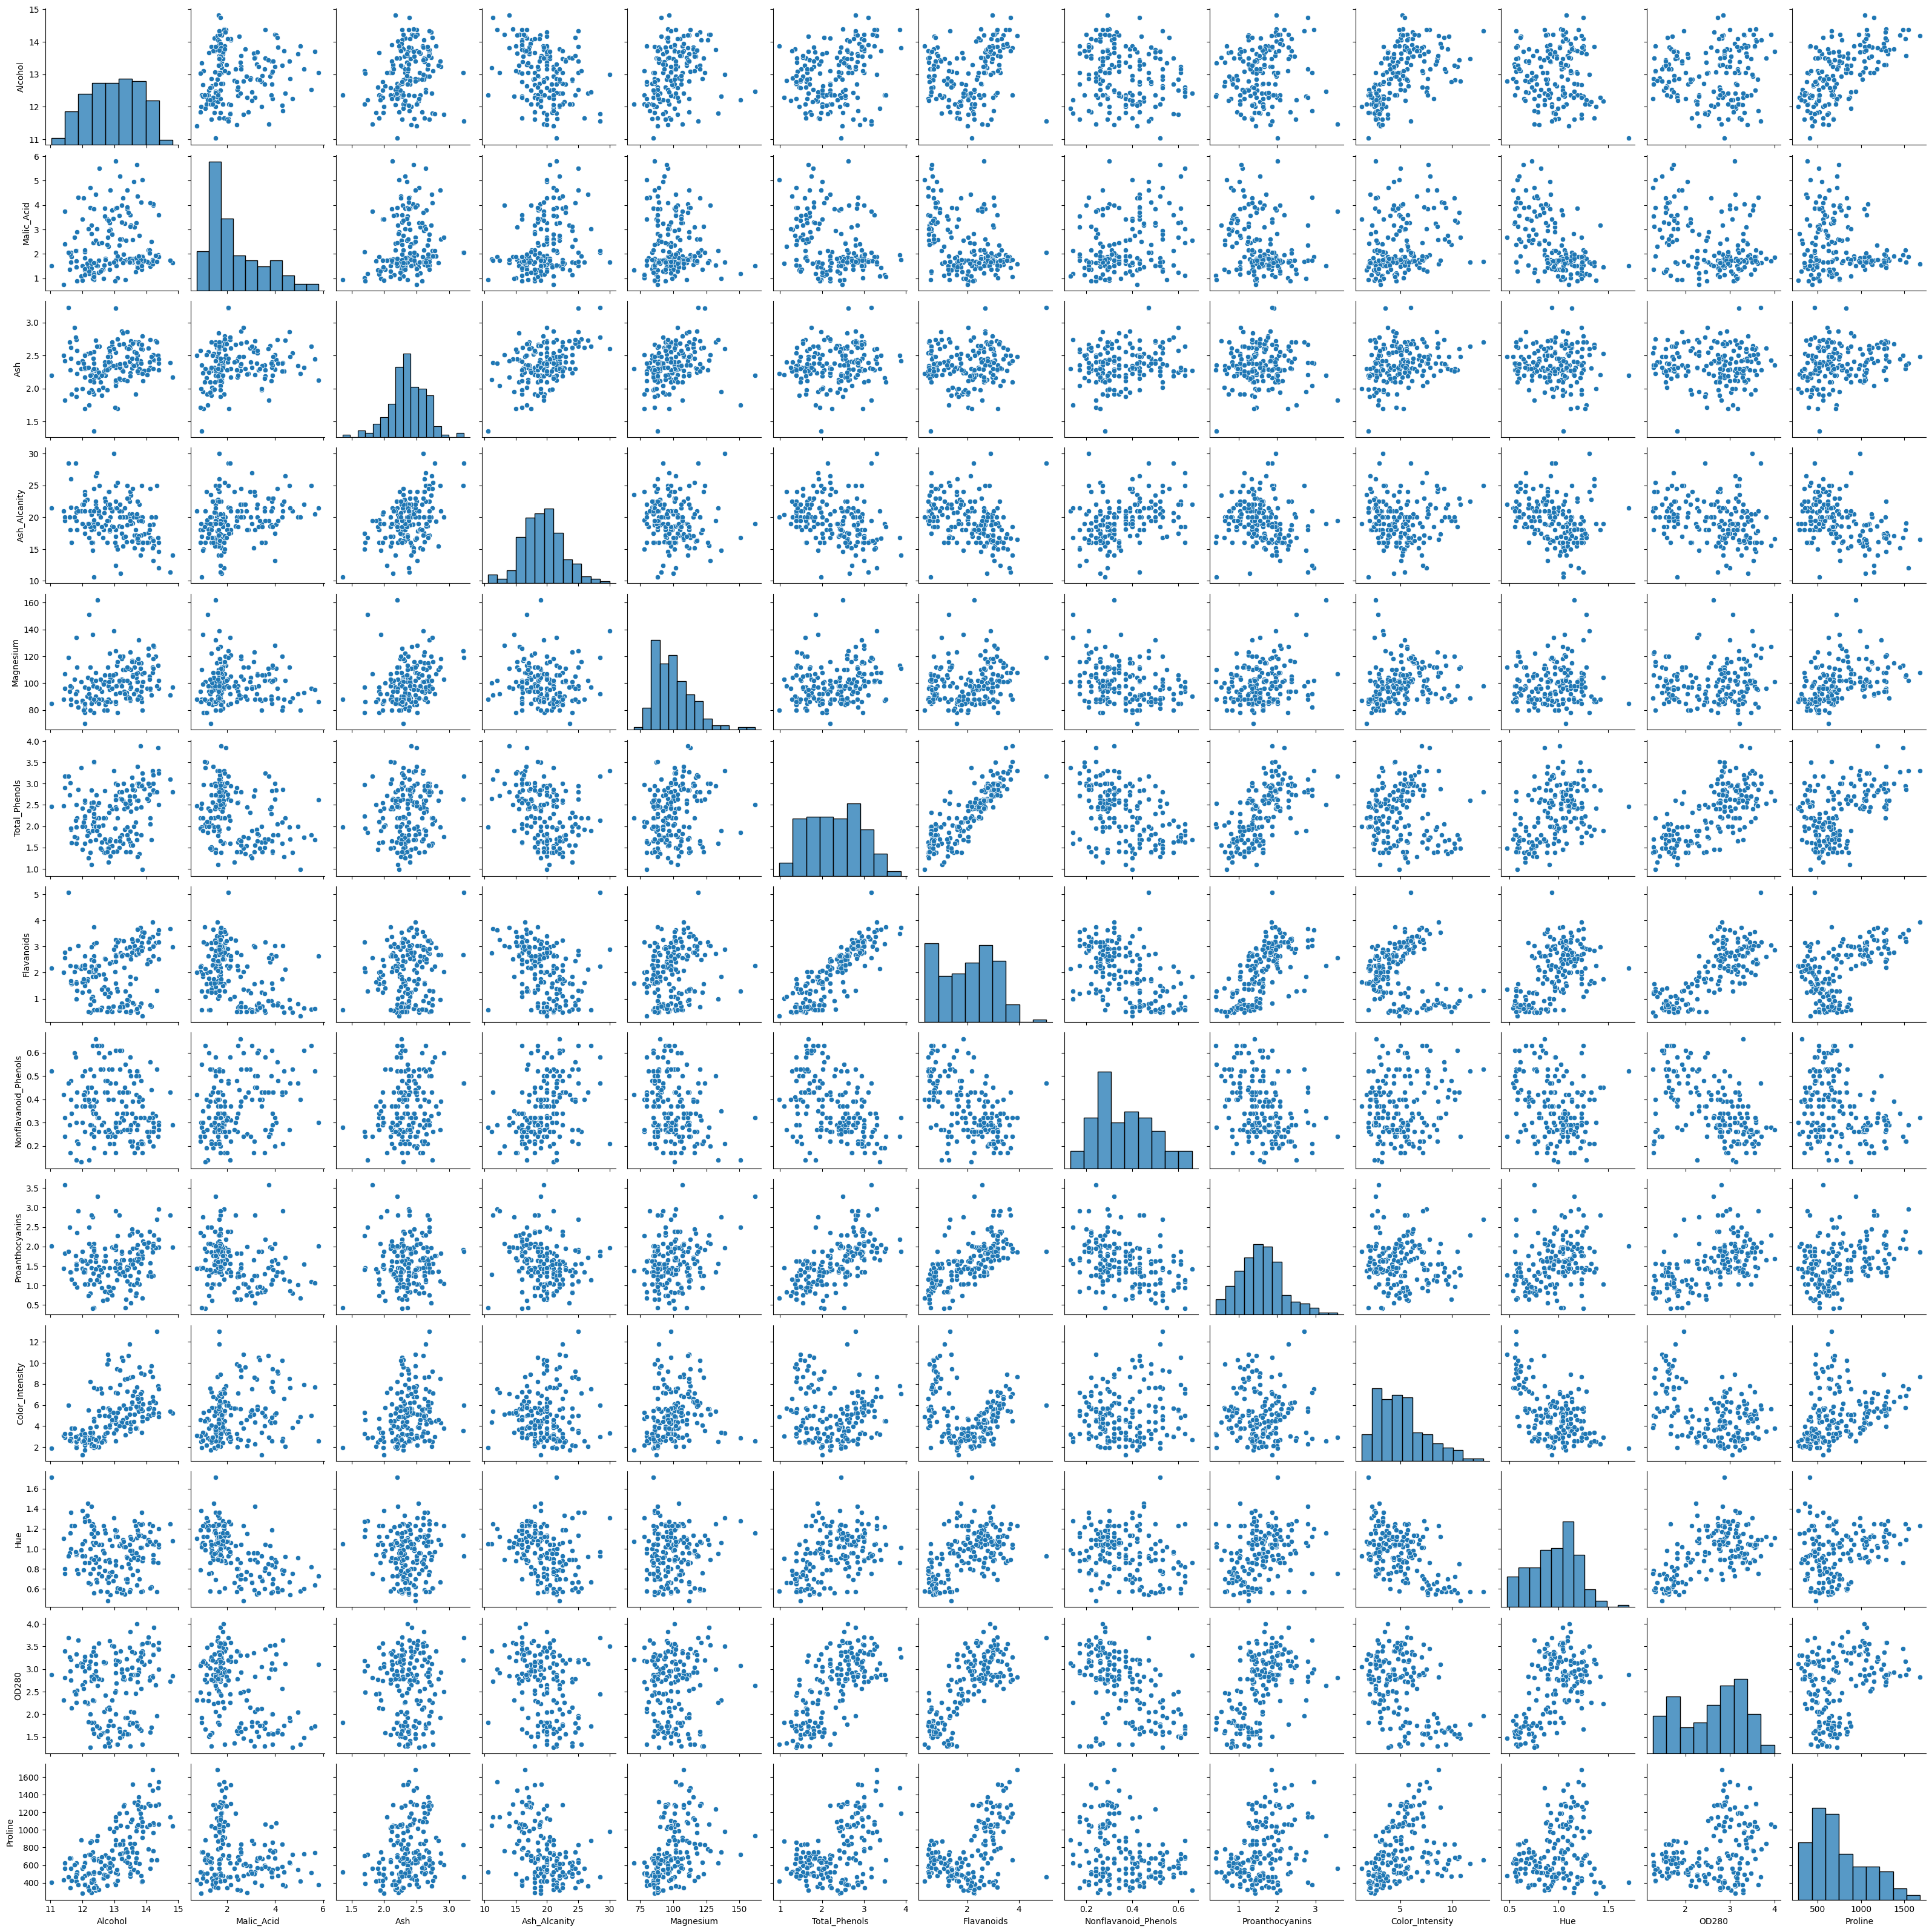

In [11]:
sns.pairplot(df)
plt.show()

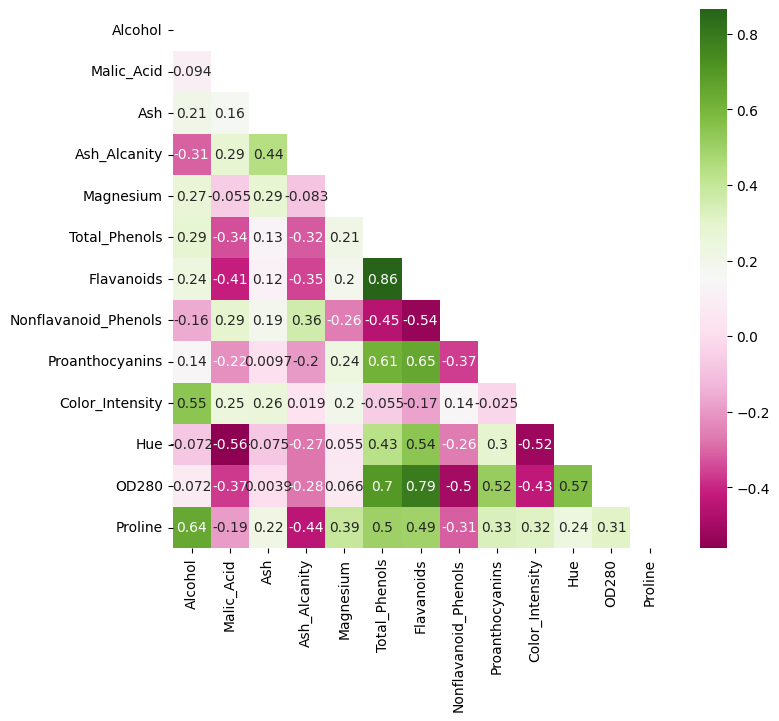

In [12]:
plt.figure(figsize=(8,7))
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='PiYG')
plt.show()

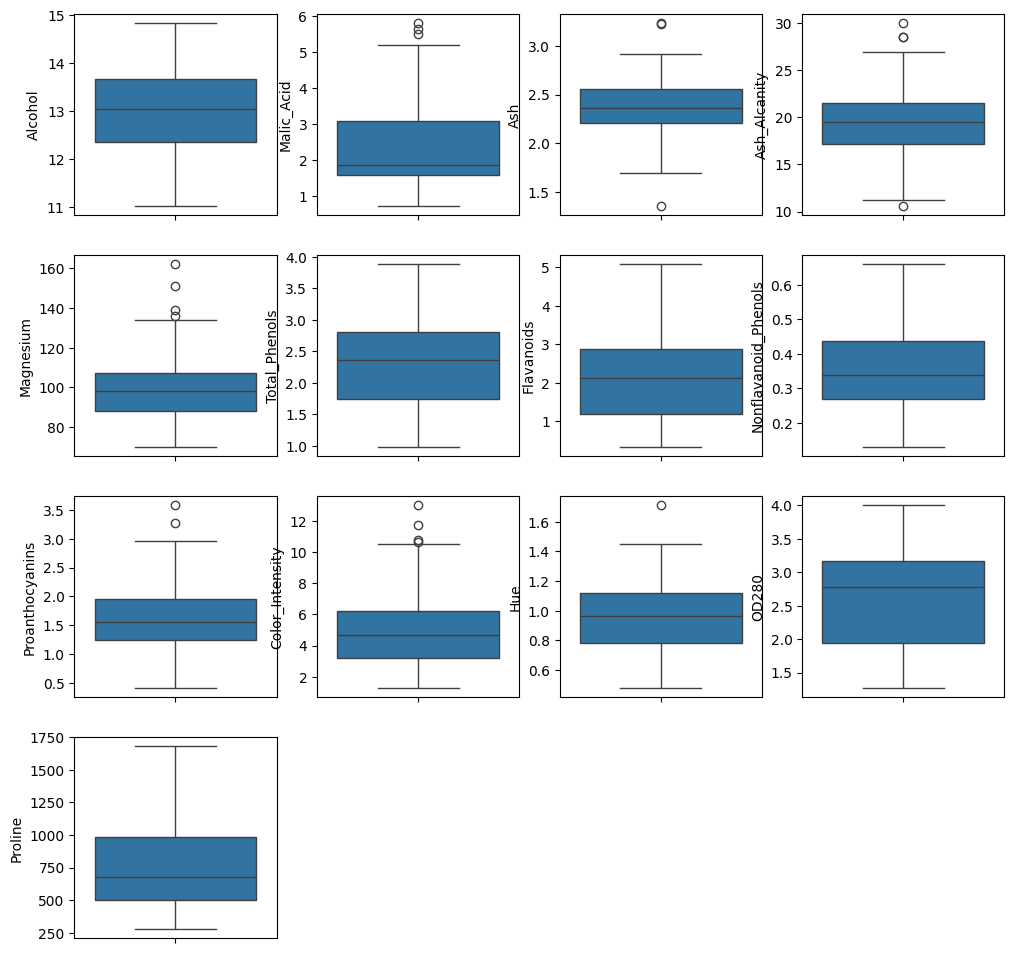

In [13]:
plt.figure(figsize=(12,12))
i=1
for c in df.columns:
    plt.subplot(4,4,i)
    sns.boxplot(df[c])   
    i+=1

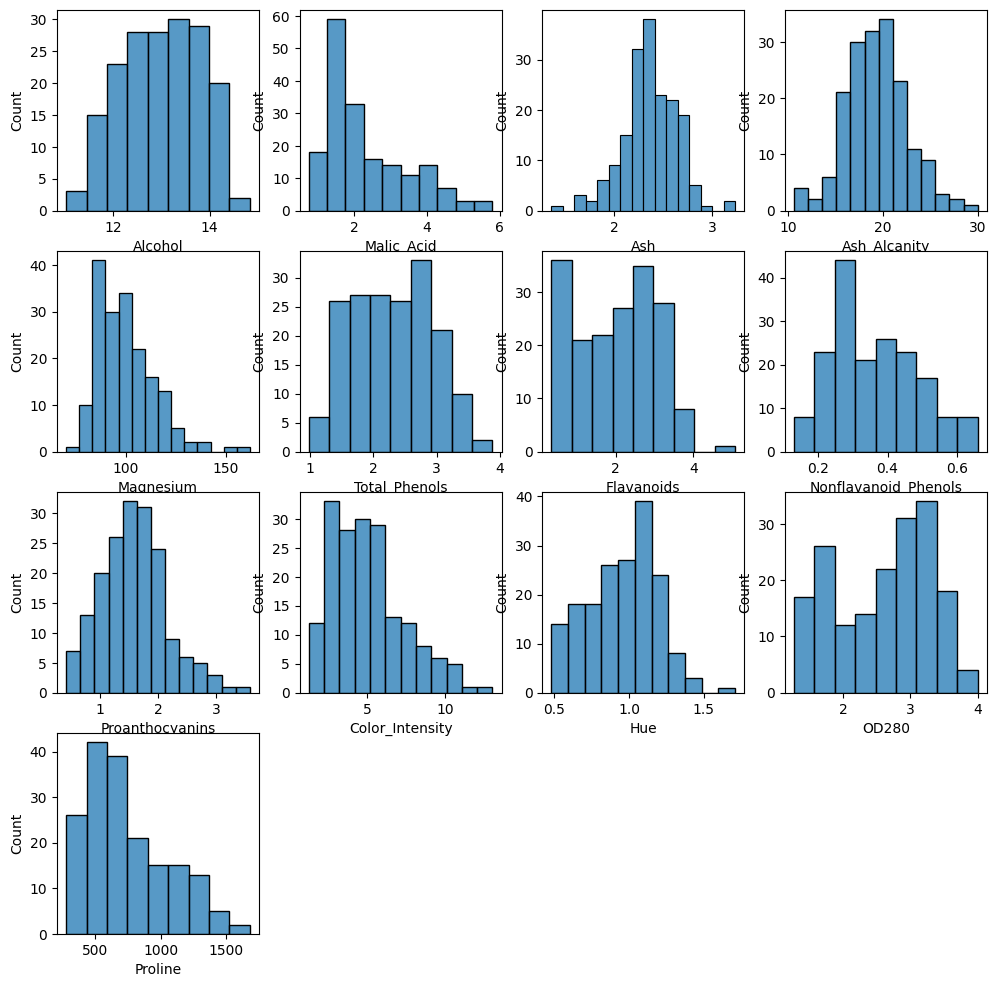

In [13]:
plt.figure(figsize=(12,12))
i=1
for c in df.columns:
    plt.subplot(4,4,i)
    sns.histplot(df[c])   
    i+=1

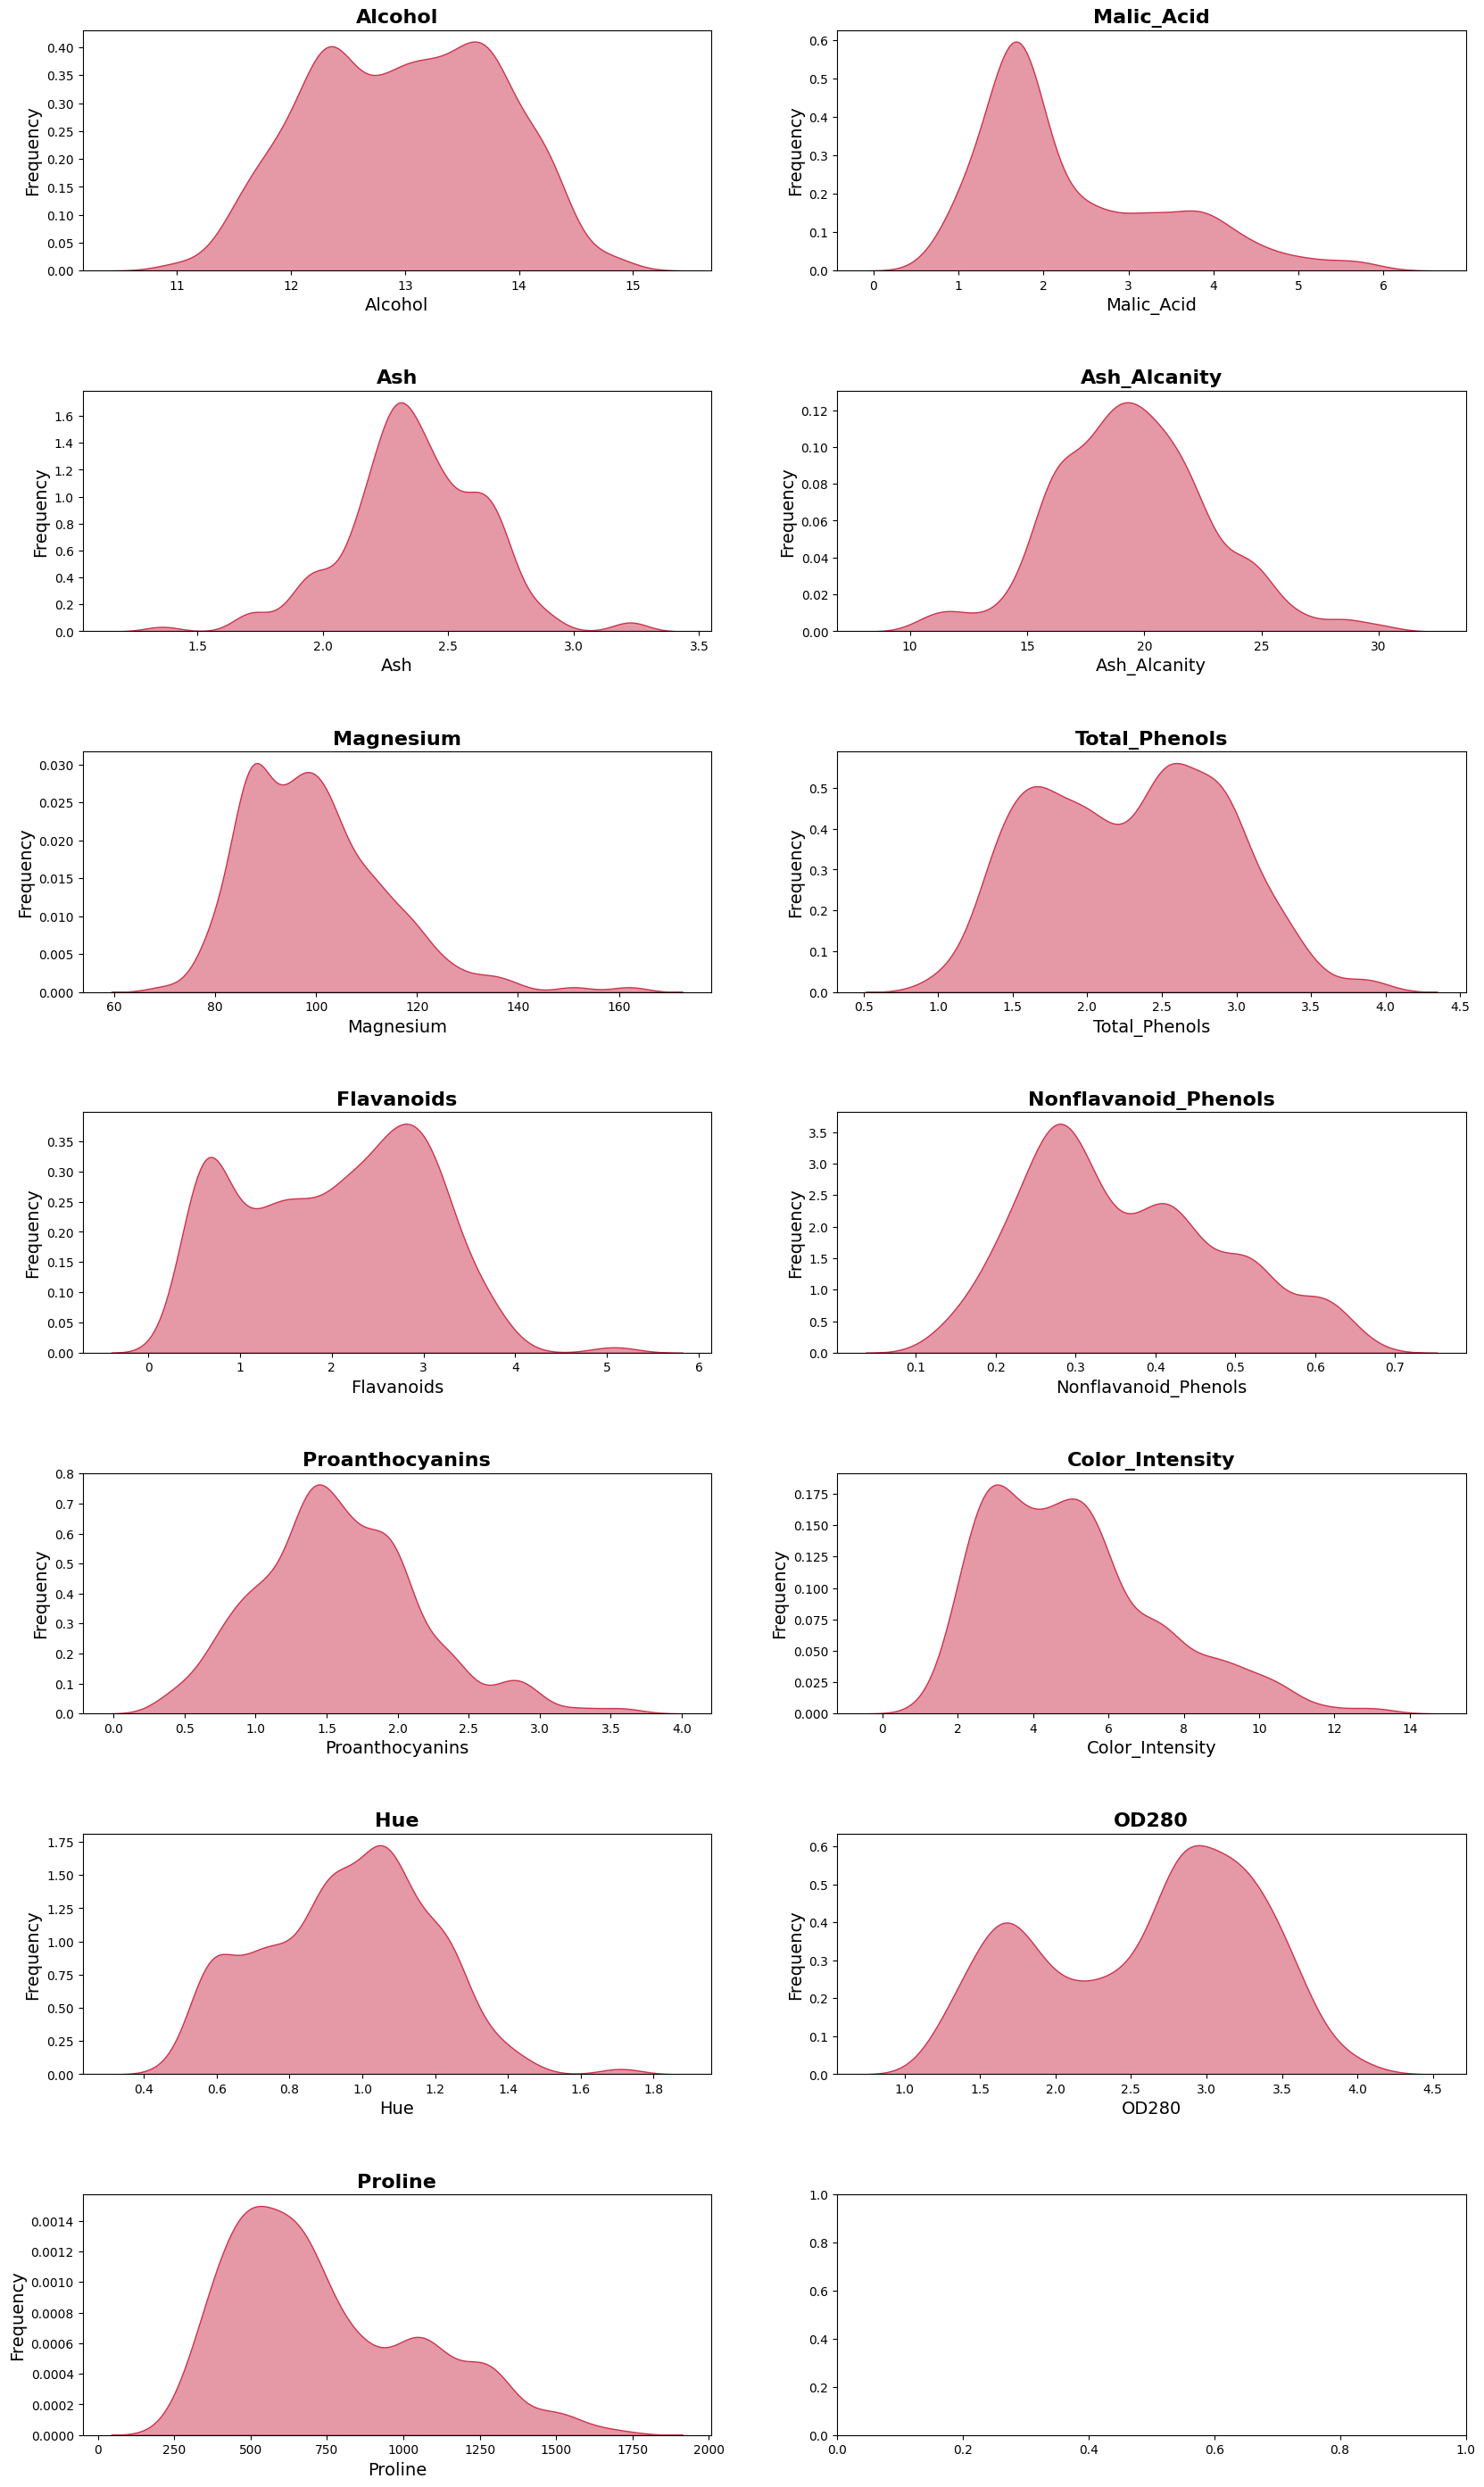

In [16]:

fig, axes = plt.subplots(7,2, figsize = (20,35))
plt.subplots_adjust(hspace=0.5)

columns = df.columns

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Frequency', fontsize = 14)
    

plt.show()

SCALING AND PCA

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_value=scaler.fit_transform(df)
X=pd.DataFrame(standard_value, columns=df.columns)

In [30]:
from sklearn.decomposition import PCA

# n_components=2 would reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])  # Update column names as per your preference

# explained variance ratio to understand how much variance is captured by each principal component
#print("Explained Variance Ratio:", pca.explained_variance_ratio_)


K MEANS

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(X_pca)
kmeans.labels_
centers=kmeans.cluster_centers_

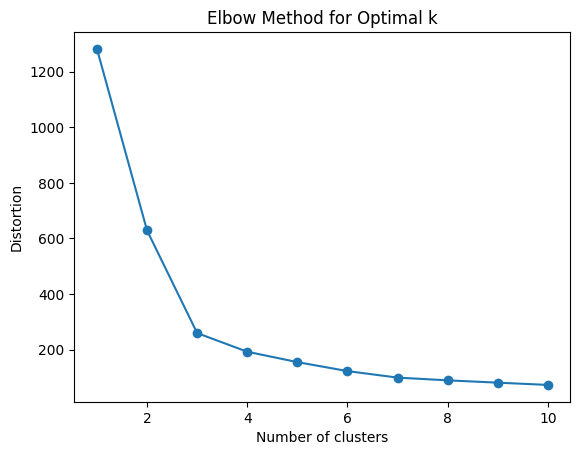

In [44]:
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pca, kmeans.labels_)

0.3886399410766114

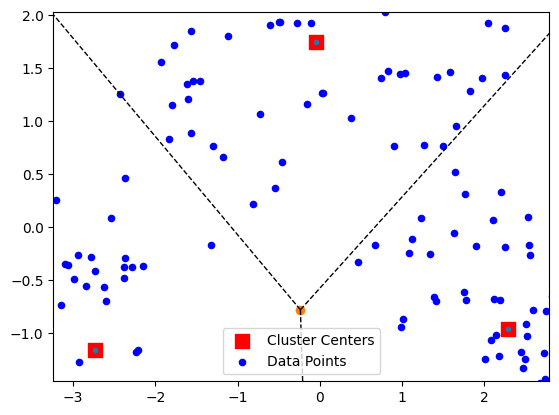

In [46]:
#PLOT CLUSTERING DONE BY K MEANS
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#centers_2d = pca.fit_transform(centers)
#X_2d = pca.transform(X)

plt.scatter(centers[:, 0], centers[:, 1], marker='s', s=100, c='r', label='Cluster Centers')
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', s=20, c='b', label='Data Points')

vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca())

plt.legend()
plt.show()

DBSCAN

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

In [48]:
import itertools
epsilons = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2, 20, step=3)
combinations = list(itertools.product(epsilons, min_samples))


In [49]:
#FINDING OPTIMAL VALUES FOR EPSILON AND MIN SAMPLE NNUMBER
def get_scores_and_labels(combinations, X_pca):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X_pca)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    print(labels)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {len(combinations)} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X_pca, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X_pca)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Index: 0, Score: -0.39757496947709225, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1

In [50]:
best_dict

{'best_epsilon': 0.7878571428571429,
 'best_min_samples': 14,
 'best_labels': array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        -1, -1,  1, -1, -1,  0, -1,  1,  1,  1, -1, -1, -1,  1,  1,  2,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
         1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1,
         2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2], dtype=int64),
 'best_score': 0.44211456066376464}

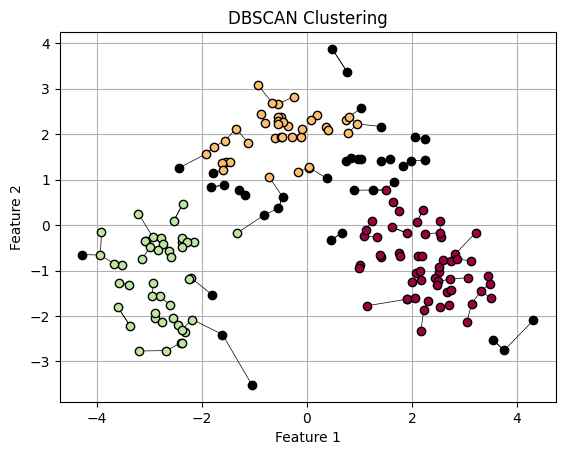

In [51]:
best_epsilon = 0.8585714285714285
best_min_samples = 17
dbscan_cluster_model = DBSCAN(eps=best_epsilon, min_samples=best_min_samples)

labels = dbscan_cluster_model.fit_predict(X_pca)

# Plot the clusters using Voronoi diagram
def plot_voronoi(X_pca, labels):
    from sklearn.neighbors import NearestNeighbors

    # Find the nearest neighbors
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(X_pca)
    distances, indices = neigh.kneighbors(X_pca)

    # Compute Voronoi diagram
    voronoi = neigh.kneighbors_graph(X_pca).toarray()

    # Plot Voronoi diagram
    for i in range(len(X_pca)):
        for j in indices[i]:
            plt.plot([X_pca[i][0], X_pca[j][0]], [X_pca[i][1], X_pca[j][1]], 'k-', linewidth=0.5)

    # Plot data points colored by clusters
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black color for noise points

        class_member_mask = (labels == k)
        xy = X_pca[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_voronoi(X_pca, labels)